In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_lfw_people
import numpy as np
import os,cv2
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
def plot_gallery(images,titles,h,w,n_row=3,n_col=4):
    plt.figure(figsize=(1.8*n_col,2.4*n_row))
    plt.subplots_adjust(bottom=0,left=.01,right=.99,top=.90,hspace=.35)
    for i in range(n_row*n_col):
        plt.subplot(n_row,n_col,i+1)
        plt.imshow(images[i].reshape((h,w)),cmap=plt.cm.gray)
        plt.title(titles[i],size=12)
        plt.xticks()
        plt.yticks()

In [3]:
dir_name="dataset/faces/"
#C:\Users\Administrator\dataset\faces
#C:\Users\Administrator\dataset
print(dir_name)
X=[]
y=[]
target_names=[]
n_samples=0
person_id=0
h=w=200
class_names=[]
for person_name in os.listdir(dir_name):
    print(person_name)
    dir_path=dir_name+person_name+"/"
    class_names.append(person_name)
    for image_name in os.listdir(dir_path):
        image_path=dir_path+image_name
        img=cv2.imread(image_path)
        gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        resized_image=cv2.resize(gray,(h,w))
        v=resized_image.flatten()
        X.append(v)
        n_samples=n_samples+1
        y.append(person_id)
        target_names.append(person_name)
    person_id=person_id+1
        
        


dataset/faces/
Aamir
Ajay
Akshay
Alia
Amitabh
Deepika
Disha
Farhan
Ileana


In [4]:
y=np.array(y)
X=np.array(X)
target_names=np.array(target_names)
n_samples=X.shape[1]
print(y.shape,X.shape,target_names.shape)

(450,) (450, 40000) (450,)


In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=110)

In [16]:
x_test.shape

(113, 40000)

In [18]:
from sklearn.decomposition import PCA
n_components=150
pca=PCA(n_components=n_components,svd_solver='randomized',whiten=True).fit(x_train)


In [19]:
 e_faces=pca.components_.reshape((n_components,h,w))

In [8]:
pip install --upgrade --force-reinstall matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/40/d9/c1784db9db0d484c8e5deeafbaac0d6ed66e165c6eb4a74fb43a5fa947d9/matplotlib-3.8.0-cp311-cp311-win_amd64.whl.metadata
  Using cached matplotlib-3.8.0-cp311-cp311-win_amd64.whl.metadata (5.9 kB)
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/e5/76/94bc17eb868f8c7397f8fdfdeae7661c1b9a35f3a7219da308596e8c252a/contourpy-1.1.1-cp311-cp311-win_amd64.whl.metadata
  Using cached contourpy-1.1.1-cp311-cp311-win_amd64.whl.metadata (5.9 kB)
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/ae/f6/724d2d236797ea7479a5a7ec8e69c2bee60cad70

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Administrator\\anaconda3\\condafiles\\Lib\\site-packages\\~-l\\_imaging.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [9]:
pip show matplotlib

Name: matplotlibNote: you may need to restart the kernel to use updated packages.

Version: 3.8.0
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: C:\Users\Administrator\anaconda3\condafiles\Lib\site-packages
Requires: contourpy, cycler, fonttools, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: catboost, seaborn


In [10]:
pip install python-dateutil

Note: you may need to restart the kernel to use updated packages.


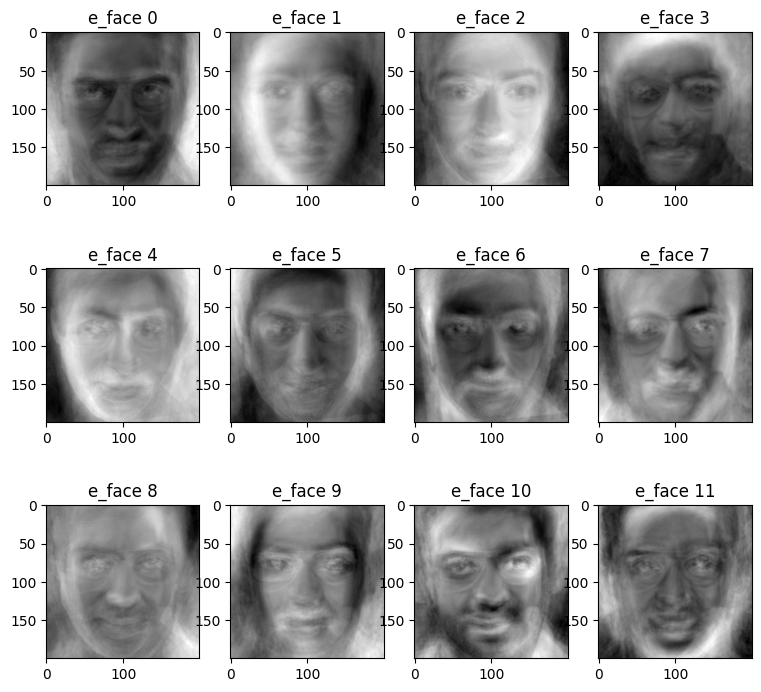

In [20]:
import matplotlib.pyplot as plt
#import matplotlib.pyplot as plt
#from matplotlib.cbook import plot_gallery
face_tiles=['e_face %d'% i for i in range(e_faces.shape[0])]
plot_gallery(e_faces,face_tiles,h,w)
plt.show()

In [21]:
x_train_pca=pca.transform(X_train)
x_test_pca=pca.transform(X_test)
print(x_train_pca.shape,x_test_pca.shape)

(337, 150) (113, 150)


In [23]:
lda=LinearDiscriminantAnalysis()
lda.fit(x_train_pca,y_train)

LinearDiscriminantAnalysis()

In [25]:
x_train_lda=lda.transform(x_train_pca)
x_test_lda=lda.transform(x_test_pca)
print("completed")

completed


In [26]:
clf=MLPClassifier(random_state=1,hidden_layer_sizes=(10,10),max_iter=1000,verbose=True).fit(x_train_lda,y_train)

Iteration 1, loss = 2.45073058
Iteration 2, loss = 2.39870183
Iteration 3, loss = 2.34970354
Iteration 4, loss = 2.30227631
Iteration 5, loss = 2.25645843
Iteration 6, loss = 2.21443300
Iteration 7, loss = 2.17139326
Iteration 8, loss = 2.13088066
Iteration 9, loss = 2.09175957
Iteration 10, loss = 2.05503227
Iteration 11, loss = 2.01839003
Iteration 12, loss = 1.98488784
Iteration 13, loss = 1.95147325
Iteration 14, loss = 1.92046841
Iteration 15, loss = 1.89088613
Iteration 16, loss = 1.86234088
Iteration 17, loss = 1.83521909
Iteration 18, loss = 1.80793582
Iteration 19, loss = 1.78159999
Iteration 20, loss = 1.75662271
Iteration 21, loss = 1.73262515
Iteration 22, loss = 1.70816903
Iteration 23, loss = 1.68500905
Iteration 24, loss = 1.66267769
Iteration 25, loss = 1.64083775
Iteration 26, loss = 1.61975881
Iteration 27, loss = 1.59913512
Iteration 28, loss = 1.57880284
Iteration 29, loss = 1.55983226
Iteration 30, loss = 1.54128915
Iteration 31, loss = 1.52320396
Iteration 32, los

Iteration 328, loss = 0.06932503
Iteration 329, loss = 0.06891952
Iteration 330, loss = 0.06856488
Iteration 331, loss = 0.06821392
Iteration 332, loss = 0.06786627
Iteration 333, loss = 0.06750709
Iteration 334, loss = 0.06718367
Iteration 335, loss = 0.06684770
Iteration 336, loss = 0.06652732
Iteration 337, loss = 0.06616655
Iteration 338, loss = 0.06588045
Iteration 339, loss = 0.06552338
Iteration 340, loss = 0.06520849
Iteration 341, loss = 0.06488513
Iteration 342, loss = 0.06457024
Iteration 343, loss = 0.06424983
Iteration 344, loss = 0.06395769
Iteration 345, loss = 0.06366167
Iteration 346, loss = 0.06333508
Iteration 347, loss = 0.06306257
Iteration 348, loss = 0.06275260
Iteration 349, loss = 0.06245594
Iteration 350, loss = 0.06217020
Iteration 351, loss = 0.06189510
Iteration 352, loss = 0.06157840
Iteration 353, loss = 0.06130401
Iteration 354, loss = 0.06103689
Iteration 355, loss = 0.06072132
Iteration 356, loss = 0.06045782
Iteration 357, loss = 0.06016624
Iteration 

Accuracy : 65.48672566371681


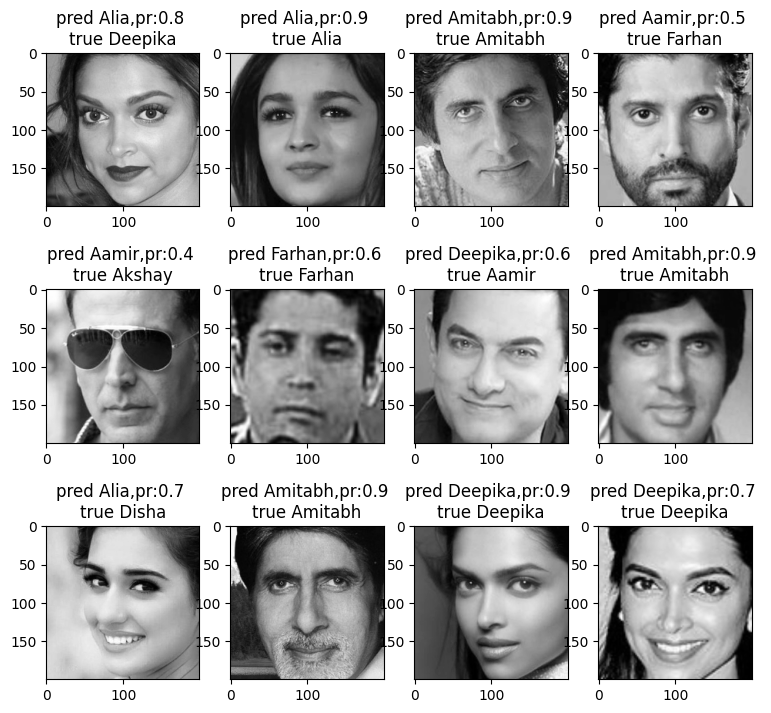

In [33]:
y_pred=[]
y_prob=[]
for test_face in x_test_lda:
    prob=clf.predict_proba([test_face])[0]
    class_id=np.where(prob==np.max(prob))[0][0]
    y_pred.append(class_id)
    y_prob.append(np.max(prob))

y_pred=np.array(y_pred)

prediction_titles=[]
true_positive=0
for i in range(y_pred.shape[0]):
    true_name=class_names[y_test[i]]
    pred_name=class_names[y_pred[i]]
    result='pred %s,pr:%s \ntrue %s'% (pred_name,str(y_prob[i])[0:3],true_name)
    prediction_titles.append(result)
    if true_name==pred_name:
        true_positive=true_positive+1

print("Accuracy :",true_positive*100/y_pred.shape[0])
plot_gallery(X_test,prediction_titles,h,w)
plt.show()